In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7ff923d08130>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397'}

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23')

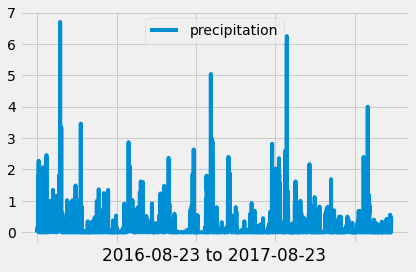

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_12 = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date >= "2016-08-23").order_by(Measurement.date).all()

# Calculate the date one year from the last date in data set.
last_12

# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(last_12, columns=['precipitation', 'date'])
df
# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


df = df.dropna()


df.plot()
plt.xlabel("2016-08-23 to 2017-08-23")
plt.legend(loc='best')
plt.xticks(visible = False)
plt.tight_layout()
plt.savefig("Last_12_Precipitaion")
plt.show()



In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(func.count(Station.station)).all()
num_stations

[(9)]

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
activity_df = pd.DataFrame(station_activity, columns= ['station_id', 'activity_count'])
activity_df = activity_df.dropna()
activity_df


,station_id,activity_count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mas = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').all()

mas_df = pd.DataFrame(mas, columns=['station','date','temperature'])
mas_df.dropna()
mas_df.describe()

,temperature
count,2772.000000
mean,71.663781
std,4.357642
min,54.000000
25%,69.000000
50%,72.000000
75%,74.000000
max,85.000000


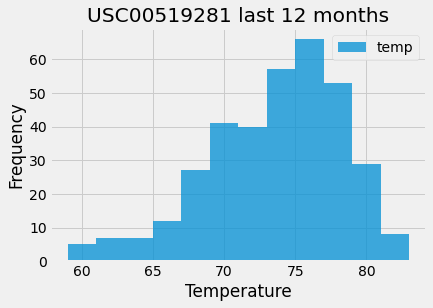

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
mas_last_12 = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= "2016-08-23").all()
mas_last_12
mas_last_12_df = pd.DataFrame(mas_last_12, columns= ['date', 'temperature'])
mas_last_12_df 


x = mas_last_12_df['temperature']
fig, ax = plt.subplots()
plt.hist(x, bins = 12, alpha=0.75, label = 'temp')
ax.set_axisbelow(True)
plt.title('USC00519281 last 12 months')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()

plt.savefig('last_12_histo.png')
plt.show()

# Close session

In [17]:
# Close Session
session.close()